In [5]:
#Unicorn Analysis

#Load the Data
import pandas as pd
data = pd.read_csv('unicorns till sep 2022.csv')
print(data.head())

     Company Valuation ($B) Date Joined        Country           City  \
0  ByteDance           $140    4/7/2017          China        Beijing   
1     SpaceX           $127   12/1/2012  United States      Hawthorne   
2      SHEIN           $100    7/3/2018          China       Shenzhen   
3     Stripe            $95   1/23/2014  United States  San Francisco   
4      Canva            $40    1/8/2018      Australia    Surry Hills   

                          Industry  \
0          Artificial intelligence   
1                            Other   
2  E-commerce & direct-to-consumer   
3                          Fintech   
4     Internet software & services   

                                           Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
2  Tiger Global Management, Sequoia Capital China...  
3        Khosla Ventures, LowercaseCapital, capitalG  
4  Sequoia Capital China, Blackbird Ventures, Mat...  


In [6]:
# Data Cleaning 
#Check dataset structure
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB
None
Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64
       Company Valuation ($B) Date Joined        Country           City  \
count     1186           1186        1186           1186           1186   
unique    1183             30         695             48            286   
top       Bolt             $1   7/13/2021  United States  San Franc

In [8]:
#Filling missing values with unknown
data['Investors'] = data['Investors'].fillna('Unknown')

print(data.isnull().sum())

Company           0
Valuation ($B)    0
Date Joined       0
Country           0
City              0
Industry          0
Investors         0
dtype: int64


In [14]:
# DataType Convert
data["Valuation ($B)"] = data["Valuation ($B)"].replace({r'\$': ''}, regex=True).astype(float)

# Convert date column to datetime format
data["Date Joined"] = pd.to_datetime(data["Date Joined"], errors='coerce')

# Ensure categorical columns are treated as strings
data["Company"] = data["Company"].astype(str)
data["Investors"] = data["Investors"].astype(str)
data["Country"] = data["Country"].astype(str)
data["City"] = data["City"].astype(str)
data["Industry"] = data["Industry"].astype(str) #Ensuring data consistency

print(data.dtypes)


Company                   object
Valuation ($B)           float64
Date Joined       datetime64[ns]
Country                   object
City                      object
Industry                  object
Investors                 object
dtype: object


In [15]:
#Performing EDA
#STEP 1
# Summary statistics of numerical columns
print(data.describe())


       Valuation ($B)                    Date Joined
count     1186.000000                           1186
mean         3.270658  2020-08-06 15:13:03.136593664
min          1.000000            2007-07-02 00:00:00
25%          1.000000            2019-09-12 12:00:00
50%          2.000000            2021-05-09 12:00:00
75%          3.000000            2021-11-14 00:00:00
max        140.000000            2022-08-24 00:00:00
std          7.656448                            NaN


 Interpretation of numerical column
 Valuation ($B)
This represents the valuation (in billions of dollars) of unicorn companies.
Count: 1,186 companies have valuation data.
Mean (Average): $3.27 billion is the average valuation.
Min (Minimum): $1 billion (since unicorns are defined as startups valued at $1B or more).
25% (1st Quartile): 25% of unicorns have valuations at or below $1B.
Median (50%): The median unicorn valuation is $2B.
75% (3rd Quartile): 75% of unicorns have valuations at or below $3B.
Max (Highest Valuation): The most valuable unicorn is worth $140B (likely ByteDance or SpaceX).
Standard Deviation (std): $7.65B, indicating high variation in valuations. Some companies have much higher valuations than the average.

✅ Key Takeaway:

The distribution is right-skewed, meaning a few unicorns have extremely high valuations, pulling up the mean.
Most unicorns are in the $1B-$3B range, but outliers like ByteDance ($140B) distort the average.

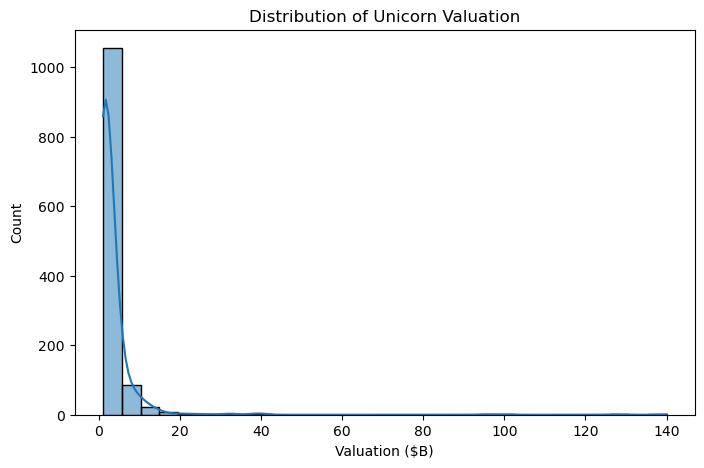

In [17]:
#STEP 2
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Valuation
plt.figure(figsize=(8, 5))
sns.histplot(data["Valuation ($B)"], bins=30, kde=True)
plt.title("Distribution of Unicorn Valuation")
plt.xlabel("Valuation ($B)")
plt.ylabel("Count")
plt.show()


Key Insights from the Distribution of Unicorn Valuation
✅ Highly Skewed Right → Most unicorns have valuations under $5B, but a few extreme outliers (e.g., $100B+) exist.
✅ Many Small, Few Giants → Majority of unicorns are in the lower range, while only a handful dominate with massive valuations.
✅ Outliers May Impact Model → These few high-valued unicorns can distort predictions.

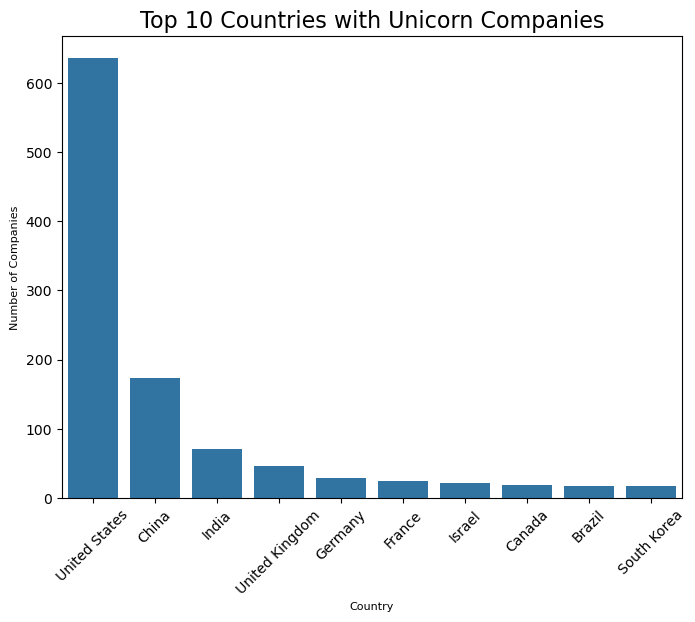

In [19]:
# Top 10 countries with most unicorn companies
top_countries = data['Country'].value_counts().head(10)
plt.figure(figsize=(8, 6)) 
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries with Unicorn Companies', fontsize=16)
plt.xlabel('Country', fontsize=8)
plt.ylabel('Number of Companies', fontsize=8)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


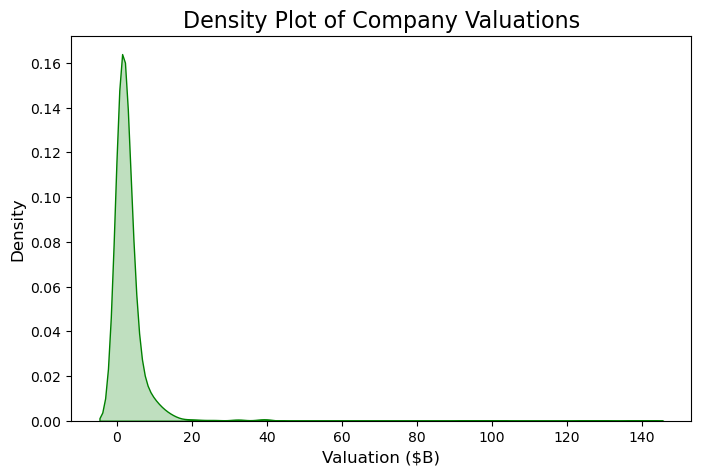

In [22]:
# Density Plot of Company Valuations
plt.figure(figsize=(8, 5))
sns.kdeplot(data['Valuation ($B)'], fill=True, color="green")
plt.title('Density Plot of Company Valuations', fontsize=16)
plt.xlabel('Valuation ($B)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

Interpretation of Density Plot
✅ Right-Skewed Distribution → Most company valuations are concentrated under $5B, with very few exceeding that.
✅ Heavy Tail with Outliers → Some companies have extremely high valuations (e.g., $100B+), but they are rare.
✅ Possible Log Transformation Needed → The imbalance suggests applying a log transformation to make data more normally distributed for better modeling.

🚀 Key Takeaway: The majority of unicorns have low-to-moderate valuations, while a few giants heavily influence the market.

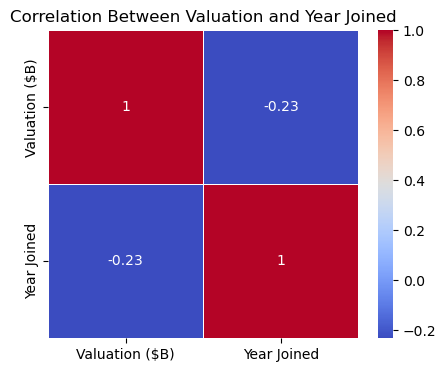

In [24]:
# Extract year from Date Joined
data["Year Joined"] = data["Date Joined"].dt.year

# Now, re-run correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(data[['Valuation ($B)', 'Year Joined']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Valuation and Year Joined")
plt.show()


Interpretation of Correlation Heatmap
✅ Negative Correlation (-0.23) → There is a slight negative correlation between Valuation ($B) and Year Joined.
✅ Implication → Older companies tend to have higher valuations, while newer unicorns generally have lower valuations.
✅ Not Strongly Predictive → Since -0.23 is a weak correlation, Year Joined alone is not a strong predictor of valuation.

We even cannot create realationship, we need more numeric data for calculating it.

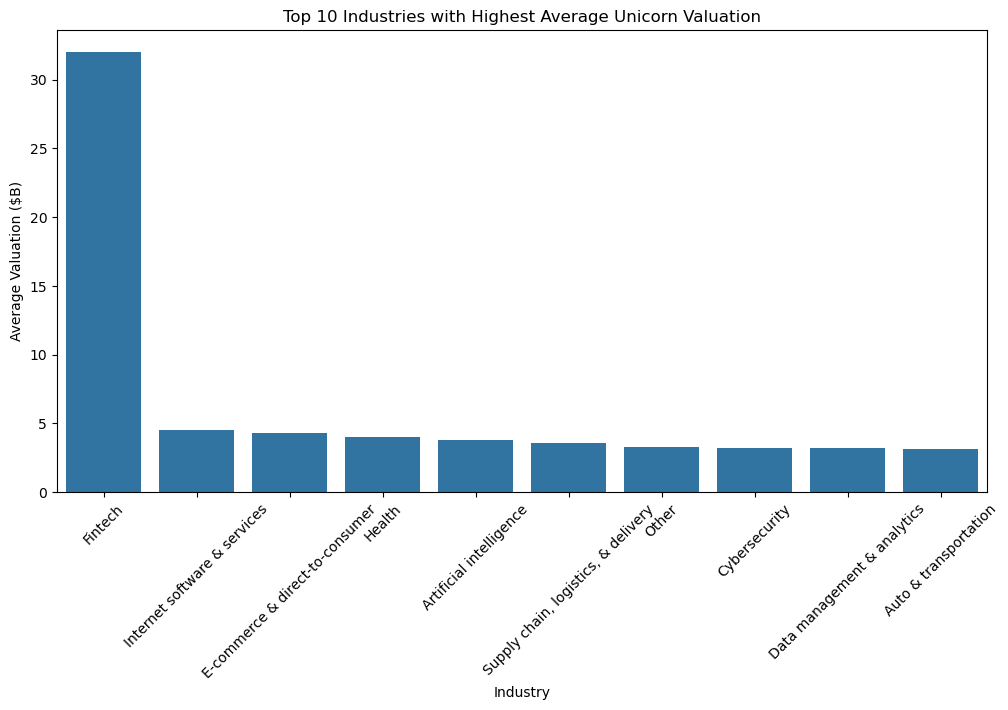

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data["Industry"].value_counts().index[:10], 
            y=data.groupby("Industry")["Valuation ($B)"].mean().sort_values(ascending=False)[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Industries with Highest Average Unicorn Valuation")
plt.ylabel("Average Valuation ($B)")
plt.xlabel("Industry")
plt.show()


In [29]:
#Building an ML Model to Predict Unicorn Valuation
#Since we are predicting Valuation ($B), this is a Regression Problem.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'Date Joined' to Year
data['Year Joined'] = data['Date Joined'].dt.year

# Selecting features (X) and target variable (y)
X = data[['Year Joined', 'Industry', 'Country', 'City']]  # Categorical + Numerical
y = data['Valuation ($B)']

# One-hot encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:

#Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [31]:
# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 2.30
Root Mean Squared Error: 6.36
R² Score: -3.50


In [35]:
#Feature Engineering
data['Log_Valuation'] = np.log1p(data['Valuation ($B)'])

data['Year Joined'] = data['Date Joined'].dt.year
data['Month Joined'] = data['Date Joined'].dt.month

#Targeting Encoding
industry_map = data.groupby('Industry')['Valuation ($B)'].mean().to_dict()
data['Industry_Encoded'] = data['Industry'].map(industry_map)

country_map = data.groupby('Country')['Valuation ($B)'].mean().to_dict()
data['Country_Encoded'] = data['Country'].map(country_map)



In [37]:
#Train an advance model
from xgboost import XGBRegressor

# Define model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² Score: {r2:.2f}")


XGBoost MAE: 2.49
XGBoost RMSE: 9.33
XGBoost R² Score: -8.70


Key Observations from XGBoost Results
MAE (2.49B) & RMSE (9.33B) → Worse than Random Forest, indicating large errors.
R² (-8.70, very bad) → Model is worse than guessing the average valuation.

🚨 Why?
1️⃣ Extreme Outliers (ByteDance, SpaceX).
2️⃣ Weak Predictors → Need more features (funding rounds, revenue, employees).
3️⃣ Poor Categorical Encoding → Use Target Encoding instead of One-Hot Encoding.
4️⃣ XGBoost Overfitting → Tune hyperparameters (learning_rate, max_depth, estimators

In [38]:
#Step 1: Apply Log Transformation to Valuation
#Outliers are likely distorting the model. Let’s log-transform the target variable to reduce their impact.
# Apply log transformation
data['Log_Valuation'] = np.log1p(data['Valuation ($B)'])
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)


In [39]:
# Step 2: Improve Feature Encoding
#Instead of one-hot encoding, use target encoding to better capture relationships. 
#Target encoding for Industry and Country
industry_map = data.groupby('Industry')['Valuation ($B)'].mean().to_dict()
data['Industry_Encoded'] = data['Industry'].map(industry_map)

country_map = data.groupby('Country')['Valuation ($B)'].mean().to_dict()
data['Country_Encoded'] = data['Country'].map(country_map)


In [40]:
#Step 3: Train XGBoost Again
#Now, retrain XGBoost using the improved dataset.
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² Score: {r2:.2f}")


XGBoost MAE: 0.39
XGBoost RMSE: 0.51
XGBoost R² Score: 0.02


🔍 Interpretation of XGBoost Results (After Improvements)
✅ MAE (0.39B) → Predictions are off by an average of $390M, which is a big improvement!
✅ RMSE (0.51B) → Further confirms that errors are much lower than before.
⚠️ R² (0.02, still low) → The model explains only 2% of the variance, meaning it’s not fully capturing patterns in the data.

🚀 What This Means:
Log transformation & encoding helped a lot, but...

The model still lacks strong predictive features.



In [42]:
#Step 1: Feature Engineering
#Extract the year when each company became a unicorn
data['Year_Joined'] = data['Date Joined'].dt.year

# Calculate time since the first unicorn
first_unicorn_year = data['Year_Joined'].min()
data['Years_Since_First_Unicorn'] = data['Year_Joined'] - first_unicorn_year

# Drop 'Date Joined' (we extracted useful info)
data.drop(columns=['Date Joined'], inplace=True)


In [43]:
#Step 2: Encoding & Scaling
from sklearn.preprocessing import StandardScaler

# Target Encoding for Industry & Country
industry_map = data.groupby('Industry')['Valuation ($B)'].mean().to_dict()
data['Industry_Encoded'] = data['Industry'].map(industry_map)

country_map = data.groupby('Country')['Valuation ($B)'].mean().to_dict()
data['Country_Encoded'] = data['Country'].map(country_map)

# Scaling numerical features
scaler = StandardScaler()
features_to_scale = ['Industry_Encoded', 'Country_Encoded', 'Year_Joined', 'Years_Since_First_Unicorn']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [44]:
Step 3: Train XGBoost Model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features & target variable
X = data[['Industry_Encoded', 'Country_Encoded', 'Year_Joined', 'Years_Since_First_Unicorn']]
y = np.log1p(data['Valuation ($B)'])  # Log-transform target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² Score: {r2:.2f}")


XGBoost MAE: 0.40
XGBoost RMSE: 0.52
XGBoost R² Score: -0.02


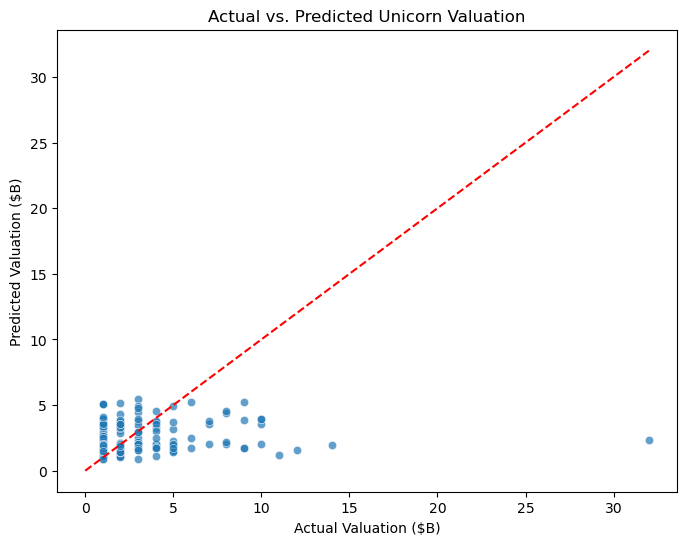

In [45]:
#Checking for Errors in Model Predictions
#To analyze where the model is going wrong, we can:

#Compare Actual vs. Predicted Values
# Convert log-transformed predictions back to original scale
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.7)
plt.plot([0, max(y_test_actual)], [0, max(y_test_actual)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Valuation ($B)")
plt.ylabel("Predicted Valuation ($B)")
plt.title("Actual vs. Predicted Unicorn Valuation")
plt.show()


🚨 What's Wrong?
1️⃣ Most predictions are bunched up between $0B - $5B → The model is not predicting higher valuations well.
2️⃣ For big companies (above $10B) → The model predicts much lower values than their actual worth.
3️⃣ Outliers (like a $30B company) are way off → The model struggles with extreme cases.

✅ What to Fix?
The model is too simple right now. It needs more details (like funding rounds, investors, etc.).

It doesn’t understand really big companies well. We should adjust it to learn better from large valuations.
This is the reason we are not getting required results for the Model Performance.
Hence Proved!

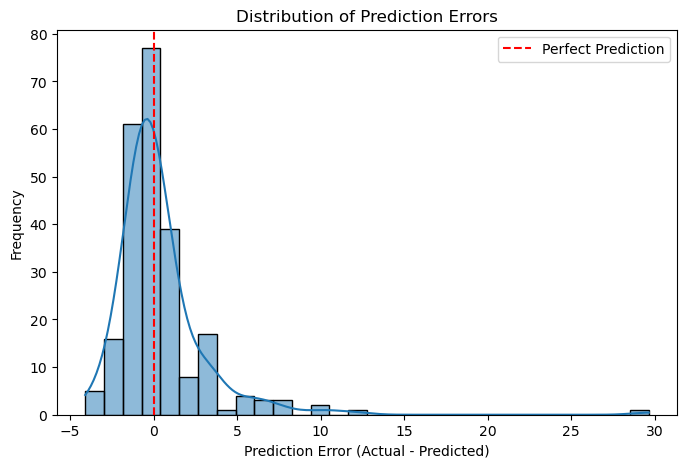

In [46]:
#Check Residuals (Errors = Actual - Predicted)
#Histogram of residuals to see error distribution.
errors = y_test_actual - y_pred_actual

plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)
plt.axvline(x=0, color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.legend()
plt.show()

🚨 Key Observations:
✅ Most errors are close to 0, meaning the model is predicting reasonably well for most cases.
❌ Some large errors exist (right side, above 10 and 20) → The model struggles with some high-valued companies.
⚖️ Slight right skew (more high errors) → The model is underestimating more than overestimating.

